<a href="https://colab.research.google.com/github/mojanshadkar/2023_ML_EES/blob/main/Final_project_Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [5]:
df = pd.read_csv('/content/drive/MyDrive/thesis/waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


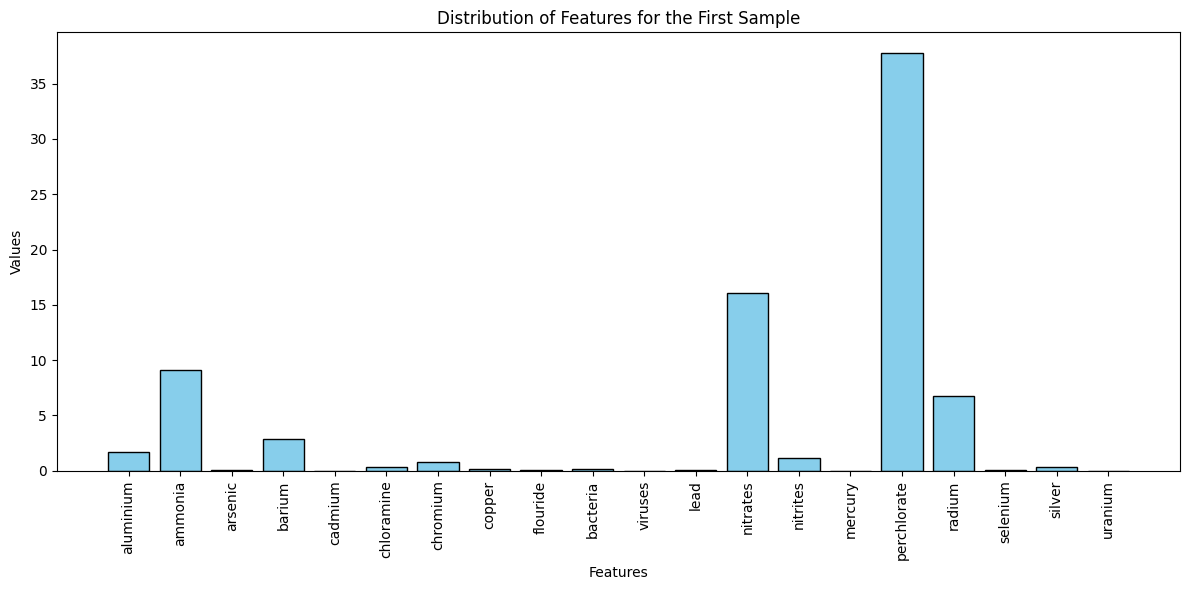

In [67]:
features = df.iloc[0, :-1]

# Create a histogram for the features from the first row
plt.figure(figsize=(12, 6))
plt.bar(features.index, features.values, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Features for the First Sample')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [6]:
df.shape

(7999, 21)

In [7]:
# Convert non-numeric columns to numeric (if possible)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Column '{col}' cannot be converted to numeric.")
    # Drop rows with NaN values in the specified column
    df.dropna(subset=['ammonia'], inplace=True)

# Check data types after conversion
print(df.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [9]:
counts = df.is_safe.value_counts()
counts

0    7084
1     912
Name: is_safe, dtype: int64

In [28]:
water_data = df.copy()
# Assuming water_data is your DataFrame after replacements

# Remove rows with missing target values
#water_data = water_data.dropna(subset=[water_data.columns[-1]])

# Now, separate the features and the labels
X = water_data.iloc[:, :-1]  # Features (all columns except the last one)
y = water_data.iloc[:, -1]   # Target variable (last column)

# Ensure the features (`X`) are numeric for imputation
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values in features
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

# Split the data into training and testing sets

# First split: 80% training, 20% for testing + validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Divide the 20% into two parts for validation and testing (10% each of the total data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)





In [39]:
X_train.shape

(6396, 20)

In [40]:
X_test.shape

(800, 20)

In [42]:
X_val.shape

(800, 20)

In [44]:
X_temp.shape

(1600, 20)

In [29]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# 1. Define hyperparameter search grid
param_grid = {'max_leaf_nodes':range(2, 121),'min_samples_split': range(2, 11)}
#2.GridSearch
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=3,verbose=1)
# 3. Fit on training set

gsc_tree.fit(X_train,y_train)



Fitting 3 folds for each of 1071 candidates, totalling 3213 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': range(2, 121),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [30]:
best_dt = gsc_tree.best_estimator_
best_dt

DecisionTreeClassifier(max_leaf_nodes=32, min_samples_split=8, random_state=42)

In [31]:
# Make predictions on the training, validation, and test sets with the best model
y_pred_train = best_dt.predict(X_train)
y_pred_val = best_dt.predict(X_val)
y_pred_test = best_dt.predict(X_test)

In [32]:
# Calculate the accuracy scores
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracy scores
print(f'Accuracy over training set: {accuracy_train:.2%}\n'
      f'Accuracy over validation set: {accuracy_val:.2%}\n'
      f'Accuracy over test set: {accuracy_test:.2%}')


Accuracy over training set: 96.26%
Accuracy over validation set: 95.00%
Accuracy over test set: 95.25%


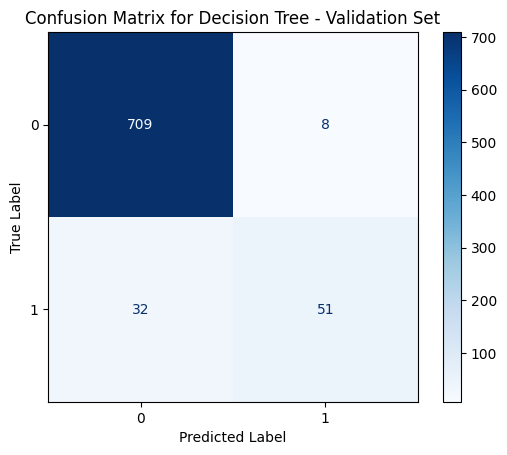

In [37]:
# Confusion Matrix for Validation Set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
disp_val = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val)
disp_val.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

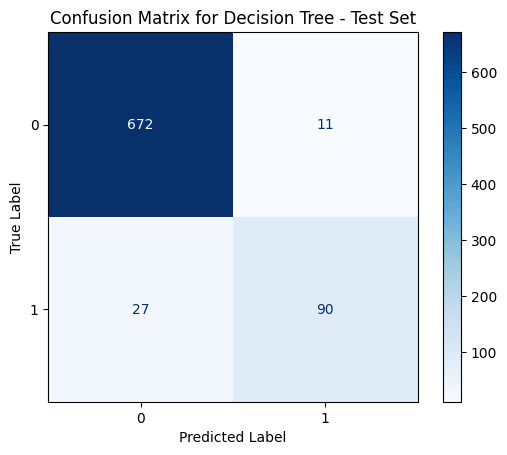

In [38]:
# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature importances from the best Decision Tree model:
        Feature  Importance
4       cadmium    0.286984
0     aluminium    0.244950
15  perchlorate    0.189748
1       ammonia    0.064203
19      uranium    0.056379
12     nitrates    0.042739
18       silver    0.024181
9      bacteria    0.021666
16       radium    0.016528
13     nitrites    0.014025
11         lead    0.012112
7        copper    0.007659
17     selenium    0.007602
14      mercury    0.006795
10      viruses    0.004427
5    chloramine    0.000000
6      chromium    0.000000
8      flouride    0.000000
3        barium    0.000000
2       arsenic    0.000000


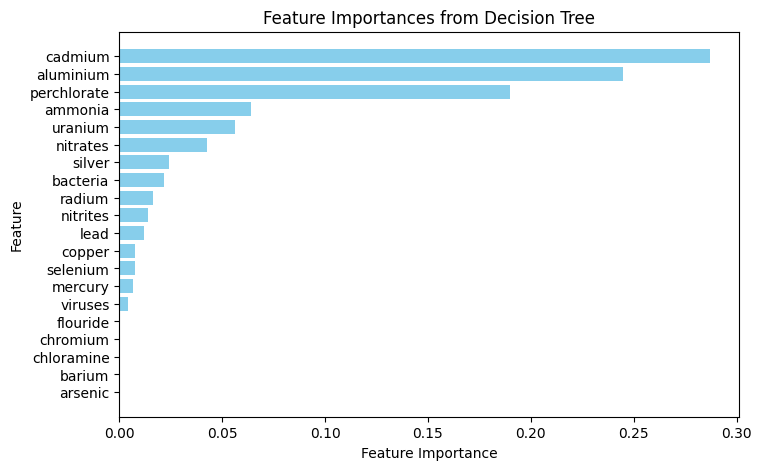

In [45]:
# Get feature importances from the best Decision Tree model found by GridSearchCV

feature_importances = best_dt.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = water_data.columns[:-1]  # Assuming last column is the target variable, adjust as necessary
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame to show the most important features at the top
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importance DataFrame
print("Feature importances from the best Decision Tree model:")
print(importances_df)


# Assuming 'feature_importances' and 'feature_names' are already defined using the best Decision Tree model

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(8, 5))  # Adjust the size as needed
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center',color='skyblue')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_train, X_val, y_train, and y_val are already defined and preprocessed

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test and validation sets
rf_predictions_test = rf.predict(X_test)
rf_predictions_val = rf.predict(X_val)

# Get feature importances from the random forest model
importances = rf.feature_importances_

# Evaluate the Random Forest's performance on the test set
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
print("Random Forest Accuracy on Test Set:", rf_accuracy_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_predictions_test))

# Evaluate the Random Forest's performance on the validation set
rf_accuracy_val = accuracy_score(y_val, rf_predictions_val)
print("\nRandom Forest Accuracy on Validation Set:", rf_accuracy_val)
print("Classification Report on Validation Set:")
print(classification_report(y_val, rf_predictions_val))

# Get the column names (feature names)
feature_names = water_data.columns[:-1]  # Assuming last column is the target

# Create a DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame to show the most important features at the top
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(importance_df)


Random Forest Accuracy on Test Set: 0.96375
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       683
           1       0.99      0.76      0.86       117

    accuracy                           0.96       800
   macro avg       0.97      0.88      0.92       800
weighted avg       0.96      0.96      0.96       800


Random Forest Accuracy on Validation Set: 0.9575
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       717
           1       0.95      0.63      0.75        83

    accuracy                           0.96       800
   macro avg       0.95      0.81      0.87       800
weighted avg       0.96      0.96      0.95       800

        Feature  Importance
0     aluminium    0.203056
4       cadmium    0.116255
15  perchlorate    0.112092
2       arsenic    0.063197
1       ammonia    0.049731
5    chl

<Figure size 800x500 with 0 Axes>

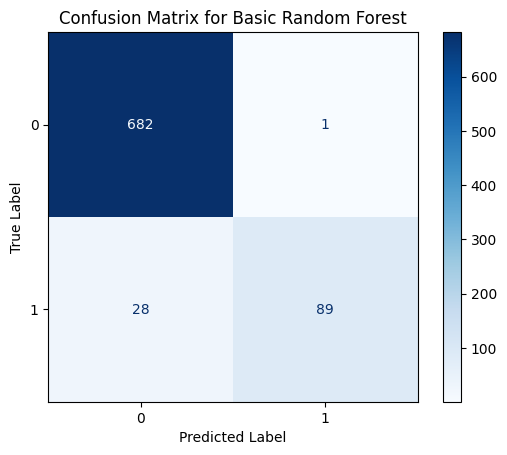

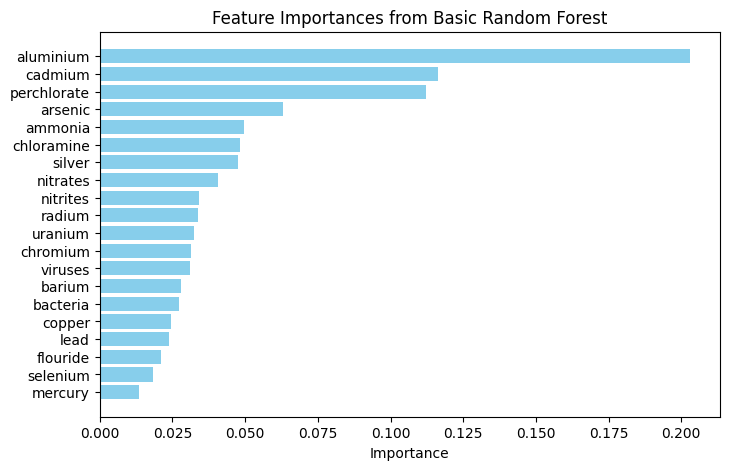

In [48]:
conf_matrix_rf = confusion_matrix(y_test, rf_predictions_test)

# Display the confusion matrix as a figure
plt.figure(figsize=(8, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Basic Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Assuming importance_df is defined

# Plotting the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Basic Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [49]:
rfcopt = RandomForestClassifier()
n_estimators = []
for i in np.arange(100,501,50):
  n_estimators.append(int(i))
param_grid = {'n_estimators': n_estimators,
              'max_features': [2,3,4,5]}
clf = HalvingGridSearchCV(rfcopt,param_grid,
                              max_resources=2000,
                              random_state=42)
clf.fit(X_train, y_train)
best_grid = clf.best_params_
print('best parameters:',best_grid)

best parameters: {'max_features': 5, 'n_estimators': 500}


In [50]:
# Initialize the optimized RandomForestClassifier
rfcopt = RandomForestClassifier(max_features=5, n_estimators=500)
rfcopt.fit(X_train, y_train)

# Predict on the test set
rfcopt_predict_test = rfcopt.predict(X_test)
rfcopt_accuracy_test = accuracy_score(y_test, rfcopt_predict_test)

# Predict on the validation set
rfcopt_predict_val = rfcopt.predict(X_val)
rfcopt_accuracy_val = accuracy_score(y_val, rfcopt_predict_val)

# Print the accuracies
print('The accuracy of improved RandomForestClassifier on Test Set:', "%.3f" % rfcopt_accuracy_test)
print('The accuracy of improved RandomForestClassifier on Validation Set:', "%.3f" % rfcopt_accuracy_val)
print('The accuracy of basic RandomForestClassifier:', "%.3f" % rf_accuracy_test)

The accuracy of improved RandomForestClassifier on Test Set: 0.964
The accuracy of improved RandomForestClassifier on Validation Set: 0.965
The accuracy of basic RandomForestClassifier: 0.964


Feature ranking:
1. aluminium (0.2072783743655287)
2. perchlorate (0.1221951564057005)
3. cadmium (0.11327820274745193)
4. arsenic (0.06900517139228783)
5. ammonia (0.052340821307505524)
6. silver (0.04848377826302134)
7. chloramine (0.04459680843555483)
8. nitrates (0.039300202881684065)
9. uranium (0.033667400561117694)
10. radium (0.03297389239643245)
11. nitrites (0.03085264128754989)
12. chromium (0.029625180805940527)
13. viruses (0.029143118135753942)
14. barium (0.02614177998146777)
15. bacteria (0.02547174404578723)
16. lead (0.02388242422495773)
17. copper (0.021731613418056902)
18. flouride (0.01912177076374606)
19. selenium (0.018056294529229494)
20. mercury (0.012853624051225624)


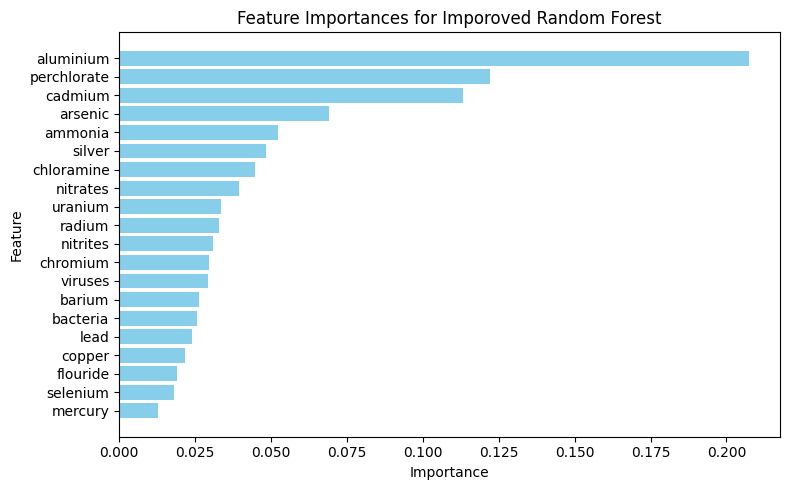

In [54]:
# Retrieve feature importances
feature_importances = rfcopt.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({feature_importances[indices[f]]})")
# Plot feature importances with feature names in descending order as a horizontal bar plot

plt.figure(figsize=(8, 5))
plt.title("Feature Importances for Imporoved Random Forest")
plt.barh(range(X.shape[1]), feature_importances[indices][::-1], align="center", color='skyblue')  # Reverse order
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices[::-1]])  # Reverse order for feature names
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()




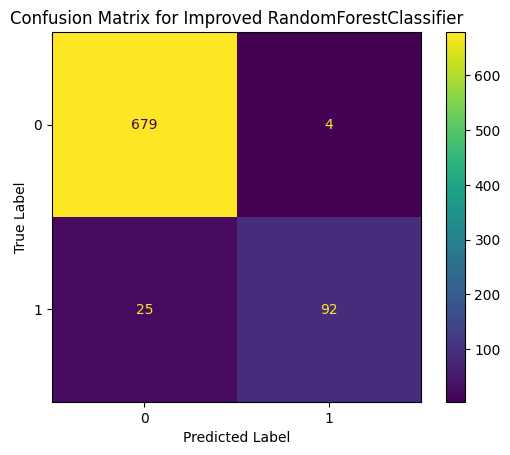

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming rfcopt and X_test, y_test are defined

# Make predictions on the test set with your improved RandomForestClassifier
rfcopt_predict = rfcopt.predict(X_test)

# Create a confusion matrix
conf_matrix_rfcopt = confusion_matrix(y_test, rfcopt_predict)

# Display the confusion matrix as a plot
disp_rfcopt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfcopt)
disp_rfcopt.plot()
plt.title('Confusion Matrix for Improved RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()


In [56]:
# X_train, X_test, y_train, y_test

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Train the classifier on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
log_reg_predictions_test = log_reg.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
log_reg_accuracy_test = accuracy_score(y_test, log_reg_predictions_test)
print(f"Logistic Regression Accuracy on Test Set: {log_reg_accuracy_test:.2%}")

# Make predictions on the validation data
log_reg_predictions_val = log_reg.predict(X_val)

# Calculate and print the accuracy of the classifier on the validation data
log_reg_accuracy_val = accuracy_score(y_val, log_reg_predictions_val)
print(f"Logistic Regression Accuracy on Validation Set: {log_reg_accuracy_val:.2%}")

# Print the classification report to get additional performance metrics for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, log_reg_predictions_test))

# Print the classification report for the validation set
print("Classification Report on Validation Set:")
print(classification_report(y_val, log_reg_predictions_val))

Logistic Regression Accuracy on Test Set: 87.88%
Logistic Regression Accuracy on Validation Set: 91.12%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       683
           1       0.76      0.25      0.37       117

    accuracy                           0.88       800
   macro avg       0.82      0.62      0.65       800
weighted avg       0.87      0.88      0.85       800

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       717
           1       0.69      0.27      0.38        83

    accuracy                           0.91       800
   macro avg       0.80      0.63      0.67       800
weighted avg       0.90      0.91      0.89       800



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


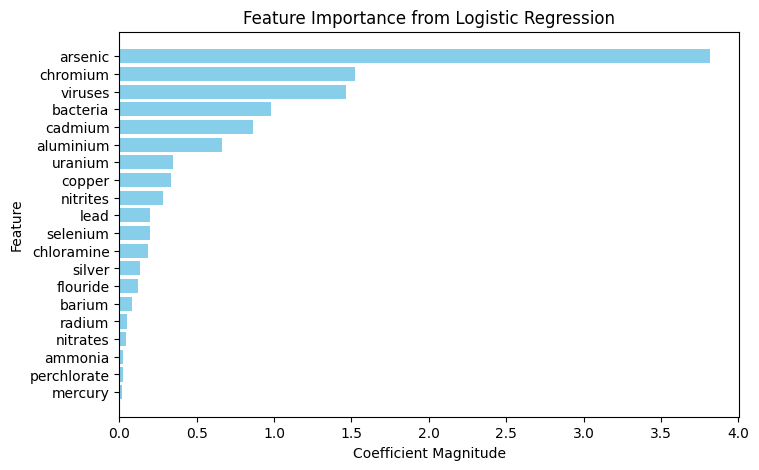

In [57]:

# Retrieving coefficients from the trained model
log_reg_coefs = log_reg.coef_[0]

# Focusing on the magnitude of coefficients to determine importance
importances = np.abs(log_reg_coefs)

# Sort the importances
sorted_indices = np.argsort(importances)

# Plotting the importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importance from Logistic Regression")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='skyblue', align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices]) # Replace feature_names with actual names if available
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

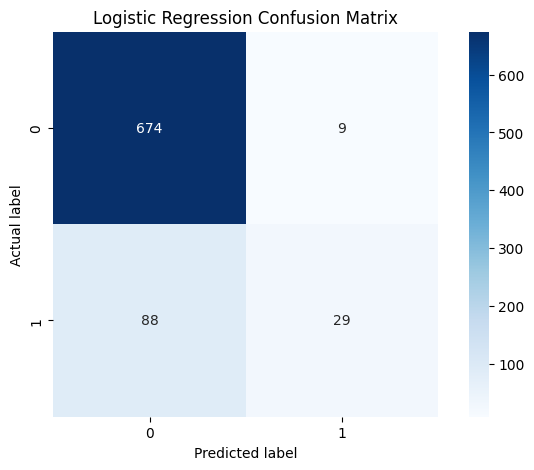

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_predictions_test)
unique_labels = np.unique(y_test) # Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 5))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



In [71]:
# Initialize the Logistic Regression classifier with specified hyperparameters
log_reg_improved = LogisticRegression(solver='liblinear', penalty='l1', C=100, random_state=42)

# Train the classifier on the training data
log_reg_improved.fit(X_train, y_train)

# Make predictions on the test data
log_reg_pred_test_improved = log_reg_improved.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
log_reg_accuracy_test_improved = accuracy_score(y_test, log_reg_pred_test_improved)
print(f"Improved Logistic Regression Accuracy on Test Set: {log_reg_accuracy_test_improved:.2%}")

# Make predictions on the validation data
log_reg_pred_val_improved = log_reg_improved.predict(X_val)

# Calculate and print the accuracy of the classifier on the validation data
log_reg_accuracy_val_improved = accuracy_score(y_val, log_reg_pred_val_improved)
print(f"Improved Logistic Regression Accuracy on Validation Set: {log_reg_accuracy_val_improved:.2%}")

# Print the classification report to get additional performance metrics for the test set
print("Classification Report for Improved Logistic Regression on Test Set:")
print(classification_report(y_test, log_reg_pred_test_improved))

# Print the classification report for the validation set
print("Classification Report for Improved Logistic Regression on Validation Set:")
print(classification_report(y_val, log_reg_pred_val_improved))


Improved Logistic Regression Accuracy on Test Set: 88.75%
Improved Logistic Regression Accuracy on Validation Set: 91.75%
Classification Report for Improved Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       683
           1       0.79      0.32      0.45       117

    accuracy                           0.89       800
   macro avg       0.84      0.65      0.69       800
weighted avg       0.88      0.89      0.87       800

Classification Report for Improved Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       717
           1       0.71      0.35      0.47        83

    accuracy                           0.92       800
   macro avg       0.82      0.67      0.71       800
weighted avg       0.91      0.92      0.90       800



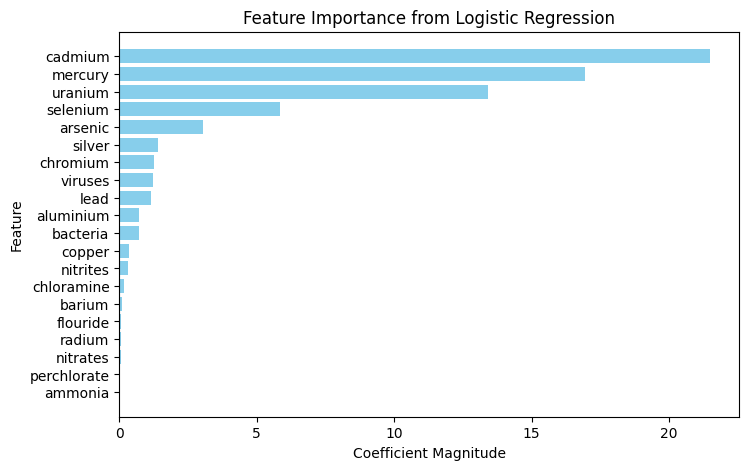

In [74]:
# Retrieving coefficients from the trained model
log_reg_coefs = log_reg_improved.coef_[0]

# Focusing on the magnitude of coefficients to determine importance
importances = np.abs(log_reg_coefs)

# Sort the importances
sorted_indices = np.argsort(importances)

# Plotting the importances
# Plotting the importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importance from Logistic Regression")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='skyblue', align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices]) # Replace feature_names with actual names if available
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

In [72]:
# Make predictions on the training data
log_reg_pred_train_improved = log_reg_improved.predict(X_train)

# Calculate and print the accuracy of the classifier on the training data
log_reg_accuracy_train_improved = accuracy_score(y_train, log_reg_pred_train_improved)
print(f"Improved Logistic Regression Accuracy on Training Set: {log_reg_accuracy_train_improved:.2%}")


Improved Logistic Regression Accuracy on Training Set: 90.95%


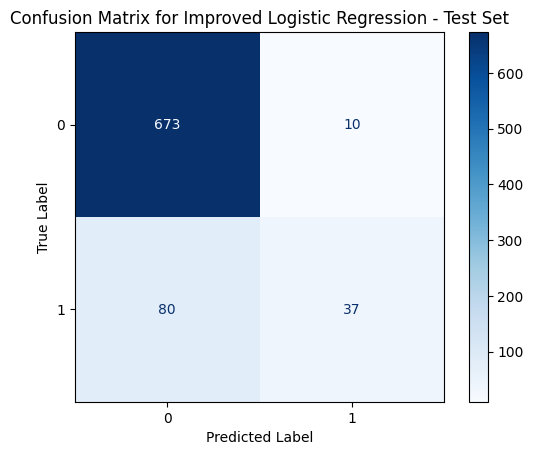

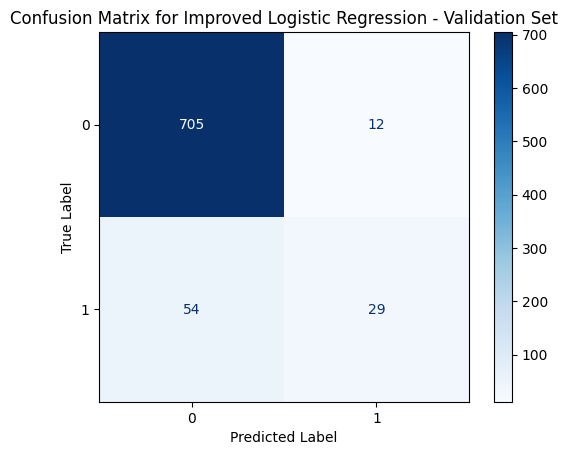

In [60]:
# Create confusion matrices for the test and validation sets
conf_matrix_test_improved = confusion_matrix(y_test, log_reg_pred_test_improved)
conf_matrix_val_improved = confusion_matrix(y_val, log_reg_pred_val_improved)

# Display the confusion matrix for the test set
disp_test_improved = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_improved)
disp_test_improved.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Improved Logistic Regression - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display the confusion matrix for the validation set
disp_val_improved = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_improved)
disp_val_improved.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Improved Logistic Regression - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


XGBoost Accuracy on Test Set: 96.75%
Classification Report for XGBoost on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       683
           1       0.93      0.84      0.88       117

    accuracy                           0.97       800
   macro avg       0.95      0.91      0.93       800
weighted avg       0.97      0.97      0.97       800

XGBoost Accuracy on Training Set: 100.00%
XGBoost Accuracy on Validation Set: 97.00%
Classification Report for XGBoost on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       717
           1       0.92      0.78      0.84        83

    accuracy                           0.97       800
   macro avg       0.95      0.89      0.91       800
weighted avg       0.97      0.97      0.97       800



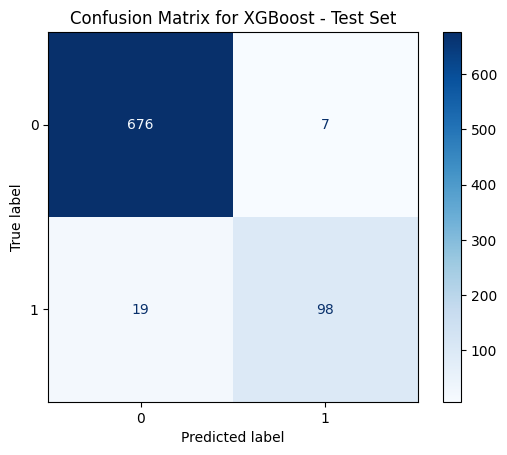

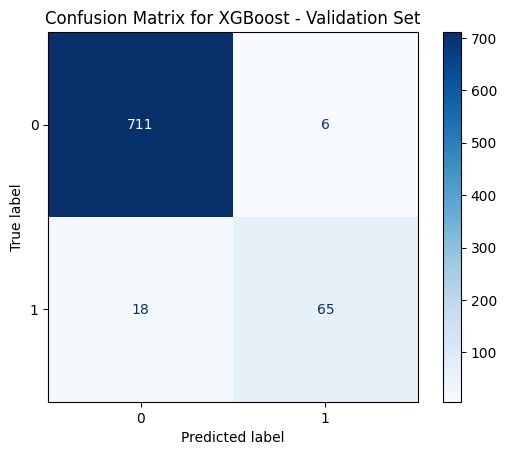

In [76]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions_test = xgb_model.predict(X_test)

# Calculate and print the accuracy of the classifier on the test data
xgb_accuracy_test = accuracy_score(y_test, xgb_predictions_test)
print(f"XGBoost Accuracy on Test Set: {xgb_accuracy_test:.2%}")

# Print the classification report for the test set
print("Classification Report for XGBoost on Test Set:")
print(classification_report(y_test, xgb_predictions_test))
# Make predictions on the training data
xgb_predictions_train = xgb_model.predict(X_train)

# Calculate and print the accuracy of the classifier on the training data
xgb_accuracy_train = accuracy_score(y_train, xgb_predictions_train)
print(f"XGBoost Accuracy on Training Set: {xgb_accuracy_train:.2%}")
# Make predictions on the validation data
xgb_predictions_val = xgb_model.predict(X_val)

# Calculate and print the accuracy of the classifier on the validation data
xgb_accuracy_val = accuracy_score(y_val, xgb_predictions_val)
print(f"XGBoost Accuracy on Validation Set: {xgb_accuracy_val:.2%}")

# Print the classification report for the validation set
print("Classification Report for XGBoost on Validation Set:")
print(classification_report(y_val, xgb_predictions_val))

# Create and display confusion matrices for the test and validation sets
conf_matrix_test_xgb = confusion_matrix(y_test, xgb_predictions_test)
conf_matrix_val_xgb = confusion_matrix(y_val, xgb_predictions_val)

disp_test_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test_xgb)
disp_val_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_val_xgb)

disp_test_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost - Test Set')
plt.show()

disp_val_xgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost - Validation Set')
plt.show()


Feature ranking:
1. cadmium (0.35513564944267273)
2. aluminium (0.0868491381406784)
3. perchlorate (0.0702405497431755)
4. silver (0.05792655795812607)
5. uranium (0.053123172372579575)
6. chloramine (0.039557285606861115)
7. ammonia (0.03827087581157684)
8. bacteria (0.03774433583021164)
9. viruses (0.03520235791802406)
10. nitrates (0.034955158829689026)
11. radium (0.030770225450396538)
12. nitrites (0.028526820242404938)
13. selenium (0.027815453708171844)
14. arsenic (0.02225993387401104)
15. copper (0.018416091799736023)
16. lead (0.018229464069008827)
17. chromium (0.013238057494163513)
18. barium (0.012139343656599522)
19. mercury (0.010611634701490402)
20. flouride (0.00898789893835783)


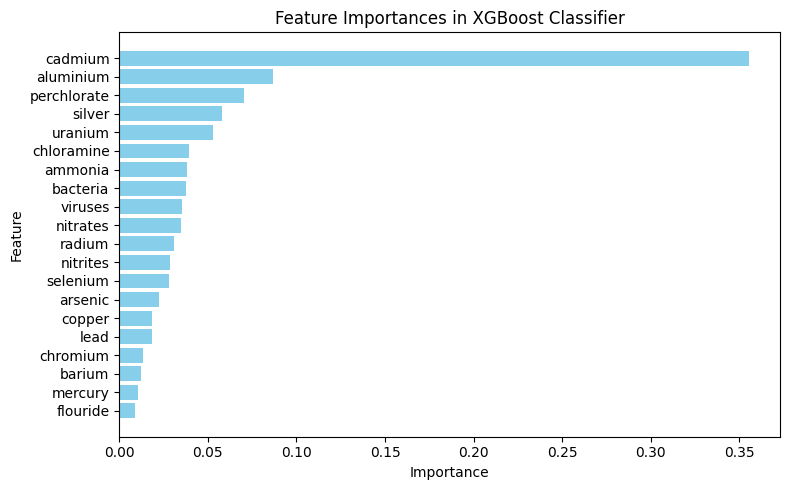

In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# ... [previous code for training and predictions] ...

# Get feature importances from the XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Get the column names (feature names)
feature_names = water_data.columns[:-1]   # Adjust if feature names are in a different variable

# Create a DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importances
})

xgb_feature_importances = xgb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(xgb_feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. {X_train.columns[indices[f]]} ({xgb_feature_importances[indices[f]]})")

# Plot feature importances with feature names in descending order as a horizontal bar plot
plt.figure(figsize=(8, 5))
plt.title("Feature Importances in XGBoost Classifier")
plt.barh(range(X_train.shape[1]), xgb_feature_importances[indices][::-1], align="center", color='skyblue')  # Reverse order
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices[::-1]])  # Reverse order for feature names
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


SVM Accuracy on Test Set: 88.12%
SVM Accuracy on Validation Set: 92.00%
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       683
           1       0.81      0.25      0.38       117

    accuracy                           0.88       800
   macro avg       0.85      0.62      0.66       800
weighted avg       0.87      0.88      0.85       800

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       717
           1       0.76      0.34      0.47        83

    accuracy                           0.92       800
   macro avg       0.84      0.66      0.71       800
weighted avg       0.91      0.92      0.91       800

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best SVM Accuracy on Test Set: 94.00%
Best SVM Accuracy on Validation Set: 93.75%
Best parameters found for SVM: {'C': 10, 'gamma': 'scal

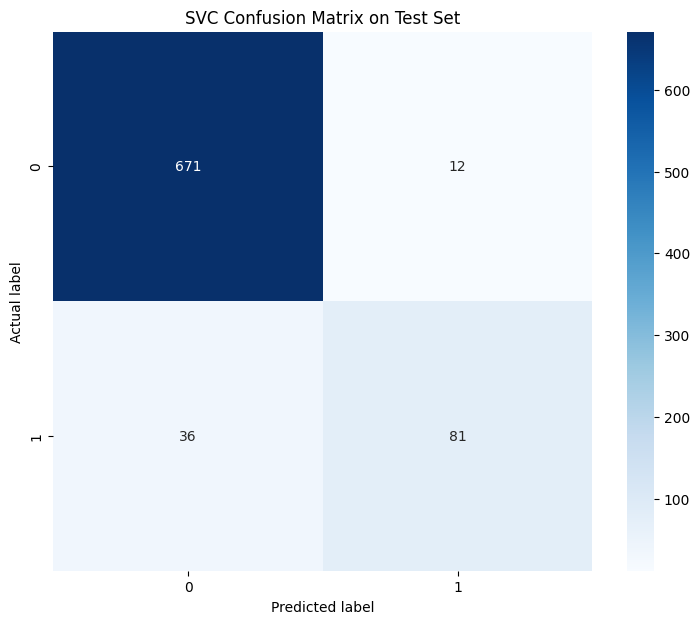

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Scale the features (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)  # Scale the validation set

# Initialize the Support Vector Classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test and validation data
svm_predictions_test = svm_clf.predict(X_test_scaled)
svm_predictions_val = svm_clf.predict(X_val_scaled)

# Calculate and print the accuracy of the classifier on the test and validation data
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)
print(f"SVM Accuracy on Test Set: {svm_accuracy_test:.2%}")

svm_accuracy_val = accuracy_score(y_val, svm_predictions_val)
print(f"SVM Accuracy on Validation Set: {svm_accuracy_val:.2%}")

# Print the classification report for detailed statistics on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, svm_predictions_test))

# Print the classification report for the validation set
print("Classification Report on Validation Set:")
print(classification_report(y_val, svm_predictions_val))

# GridSearchCV for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best estimator
best_svm_clf = grid_search_svm.best_estimator_

# Make predictions using the best model on the test and validation data
best_svm_predictions_test = best_svm_clf.predict(X_test_scaled)
best_svm_predictions_val = best_svm_clf.predict(X_val_scaled)

# Calculate and print the accuracy of the best classifier on the test and validation data
best_svm_accuracy_test = accuracy_score(y_test, best_svm_predictions_test)
print(f"Best SVM Accuracy on Test Set: {best_svm_accuracy_test:.2%}")

best_svm_accuracy_val = accuracy_score(y_val, best_svm_predictions_val)
print(f"Best SVM Accuracy on Validation Set: {best_svm_accuracy_val:.2%}")

# Print the best parameters found
print("Best parameters found for SVM:", grid_search_svm.best_params_)

# Print the classification report for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, best_svm_predictions_test))

# Print the classification report for the validation set
print("Classification Report on Validation Set:")
print(classification_report(y_val, best_svm_predictions_val))

# Generate and plot the confusion matrix for SVM on the test set
svm_cm_test = confusion_matrix(y_test, best_svm_predictions_test)
plt.figure(figsize=(9, 7))
sns.heatmap(svm_cm_test, annot=True, fmt='d', cmap="Blues", square=True)
plt.title('SVC Confusion Matrix on Test Set')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Optionally, you can also plot the confusion matrix for the validation set
